# Data Science for Beginners Workshop
@Le Wagon Tokyo - Coding Bootcamp - 2019-08-08

Fabian Dubois

Get the code here:

<img style="float:left" src="./images/qr.png"></img>

![](./images/Data_Science_VD.png)



(image credit Drew Conway under creative common license)

# Workshop content

In parallel:

* discover the notebook environment
* discover python
* discover some techniques to get

2 Parts:
* First one focuses on python and visualization
* the second one on modelisation and domain knowledge


# Getting ready

We need a python 3.6+ notebook environment and a recent browser for the workshop.


github.com/fabid/datascience-workshop

![](./images/qr.png)

## Option 1: you have a google account

Go to:
[Google Colab](https://colab.research.google.com)

## Option 2: you have a python3 development environment installed

    git clone xxx
    virtualenv -p python3 ds-workshop-venv
    source ds-workshop-venv/bin/activate
    cd ds-workshop
    pip install -r requirements.txt
    jupyter lab



# What is data science?


![](./images/Data_Science_VD.png)

background in mathematics
background in science
experience in python
has used a notebook environemnet
has used matlab

## Typical task of team with data scientists:

Reporting / analytics:

* Build a one time report
* Build a recurring report
* Build an interactive report

Modelisation:

* Build a model for a recurrent prediction
* Build a tool using a a model to deliver predictions on demand



## Examples of data science projets

* Given historical data of electricity usage from a group of electricty consummers, can we estimate the electricity need for the next day?
* Given a set of activity patterns of a resident in a care facility, can we identify indicators of apperance of medical complicatons?

**There is a wide range of data science projects with overlap in skills, but different aproaches and goals**


## A day in the life of a data scientist

* 09:15 <span style='color:purple'>Check recent performance reports of deployed models</span>
* 09:30 <span style='color:green'>Mathematics work on a cost function optimization</span>
* 10:30 <span style='color:salmon'>Scrum meeting with software engineers</span>
* 11:00 <span style='color:salmon'>Deployment of pipeline and model updates</span>
* 13:30 Lunch
* 14:30 <span style='color:purple'>Meeting with business team to clarify requirements of a new product</span>
* 15:00 <span style='color:green'>Test of new idea for a model / research paper review</span>
* 16:00 <span style='color:salmon'>Design and development of charts for a new report.</span> 
* 18:30 wrap up


Each day is different!

## Example of challenges

Challenge in (electricity procurement):

* Large amounts of data to process
* Some unreliability in data source causing missing data or duplications
* High sensitivity of prices to very small changes in the market situation

Another project (space robotics):

* No access to deployment environment and no easy feedback cycle
* Need to generate analogue data while preventing biases

Another project (elderly care domain):
* Low signal to noise ratio in the data
* Relatively low computer / data litteracy in users
* High cost of false positives and false negatives
* Ground truth data acquisition cost is high



## Why hacking / software?

A software based approach to data analysis enables

* testing
* versioning
* scalability
* repeatability
* flexibility

## The notebook environment and python basics

An interactive environment where different content types are mixed.

Text, images and math in markdown like this text.

$ y=\sum_{i=1}^n g(x_i) $

In [1]:
# This is a python comment in a python code cell
# This python code on the next line can be executed
1 + 2

3

In [2]:
# python imports
from datetime import datetime
# We can even access inline help
datetime.now?

Signature: datetime.now(tz=None)
Docstring:
Returns new datetime object representing current time local to tz.

  tz
    Timezone object.

If no tz is specified, uses local timezone.
Type:      builtin_function_or_method


In [3]:
# example of string interpolation
text = f"This presentation was generated generated from a notebook at {datetime.now()}"
print(text)

This presentation was generated generated from a notebook at 2019-08-08 16:33:44.628570


Be careful, the **execution order is important**, when in doubt:

    Kernel -> Restart kernel and run all cells (jupyter lab)
    Runtime -> Restart and run all (Colab)

## Data in python

In python, data is typically organised in a **list**.

In [4]:
my_list = ['This', 'is', 'a', 'list']
my_list

['This', 'is', 'a', 'list']

In [5]:
# We can use list comprehensions to apply functions on data in a list
[word.endswith('s') for word in my_list]

[True, True, False, False]

But data does not always come as a list. 

In [6]:
"This is a string"

'This is a string'

In [7]:
"We can make a list of words from a string".split(' ')

['We', 'can', 'make', 'a', 'list', 'of', 'words', 'from', 'a', 'string']

In [8]:
list("Or a list of characters")[:10] # Only keep first 10 items

['O', 'r', ' ', 'a', ' ', 'l', 'i', 's', 't', ' ']

Q1: How would you split a paragraph to a list of sentences?

Q2: How would you parse a csv?

In [9]:
csv = """col1,col2,col3
4,5,8
1,2,4
1,3,4"""

# Let's get real

We will get the attendee list from the meetup page.

Open the developer tool to discover the data API.
[Today's meetup event page](https://www.meetup.com/Le-Wagon-Tokyo-Coding-Station/events/263472163/)

The result is in JSON format.

In [10]:
import requests
meetup_data_url = 'https://www.meetup.com/mu_api/urlname/events/eventId/attendees?queries=%28endpoint%3ALe-Wagon-Tokyo-Coding-Station%2Fevents%2F263472163%2Frsvps%2Cmeta%3A%28method%3Aget%29%2Cparams%3A%28desc%3A%21t%2Cfields%3A%27answers%2Cpay_status%2Cself%2Cweb_actions%2Cattendance_status%27%2Conly%3A%27answers%2Cresponse%2Cattendance_status%2Cguests%2Cmember%2Cpay_status%2Cupdated%27%2Corder%3Atime%29%2Cref%3AeventAttendees_Le-Wagon-Tokyo-Coding-Station_263472163%2Ctype%3Aattendees%29'

In [11]:
response = requests.get(meetup_data_url)

In [12]:
#response.json()

In [13]:
# let's save the data
import json
with open('data/meetup_data.json', 'w+') as f:
    json.dump(response.json(), f)

In [14]:
attendees_json  = response.json()['responses'][0]['value']
len(attendees_json)

50

In [15]:
# That is what a data point looks like
attendees_json[0]

{'updated': 1565233137000,
 'member': {'id': 222446220,
  'name': 'Francois R.',
  'photo': {'id': 264478148,
   'highres_link': 'https://secure.meetupstatic.com/photos/member/e/3/2/4/highres_264478148.jpeg',
   'photo_link': 'https://secure.meetupstatic.com/photos/member/e/3/2/4/member_264478148.jpeg',
   'thumb_link': 'https://secure.meetupstatic.com/photos/member/e/3/2/4/thumb_264478148.jpeg',
   'type': 'member',
   'base_url': 'https://secure.meetupstatic.com'},
  'web_actions': {'group_profile_link': 'https://www.meetup.com/Le-Wagon-Tokyo-Coding-Station/members/222446220'},
  'event_context': {'host': False}},
 'guests': 0,
 'response': 'no'}

# Here comes Pandas

The primary data structures in pandas are implemented as two classes:

* **DataFrame**, which you can imagine as a relational data table, with rows and named columns.
* **Series**, which is a single column. A DataFrame contains one or more Series and a name for each Series.

In [16]:
import pandas as pd
attendees_df = pd.DataFrame(attendees_json)
attendees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
updated     50 non-null int64
member      50 non-null object
guests      50 non-null int64
response    50 non-null object
dtypes: int64(2), object(2)
memory usage: 1.7+ KB


In [17]:
attendees_df.head()

,updated,member,guests,response
0,1565233137000,"{'id': 222446220, 'name': 'Francois R.', 'phot...",0,no
1,1565233136000,"{'id': 27397742, 'name': 'Yuri N.', 'photo': {...",0,yes
2,1565222073000,"{'id': 194887823, 'name': 'Vivek J.', 'photo':...",0,waitlist
3,1565184290000,"{'id': 237831623, 'name': 'Nattanan W.', 'phot...",0,waitlist
4,1565126856000,"{'id': 62584832, 'name': 'Yohann S.', 'photo':...",0,waitlist


In general it is convenient to have data organised in a canonical form:

1 record = 1 row withhout nested data.

This is similar to what you would have in a table of a relational database or in a spreadsheet.

In [18]:
attendees_df['name'] = attendees_df.member.apply(lambda x: x['name'])

# When did people register?

We will plot the number of people who updates their attendance for each hour of the week.
We will use **matplotlib** to display the result

In [19]:
attendees_df['updated_date'] = pd.to_datetime(attendees_df.updated, unit='ms')

In [20]:
import calendar
from matplotlib import pyplot as plt

plt.hist2d(attendees_df.updated_date.dt.weekday, (attendees_df.updated_date.dt.hour+9)%24)
plt.xlabel('weekday')
plt.ylabel('time of the day')
plt.xticks(ticks=range(7),labels=list(calendar.day_name));

# About Math in python

In [21]:
X = range(20)
X, list(X)

(range(0, 20),
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [22]:
import math
Y = [math.sin(x / math.pi *2.) for x in X] # list comprehension

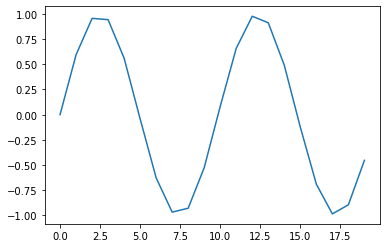

In [23]:
plt.plot(X, Y)

# Numpy brings array operations, faster array processing

In fact, pandas builds on top of numpy, bringing easier I/O and labelles arrays

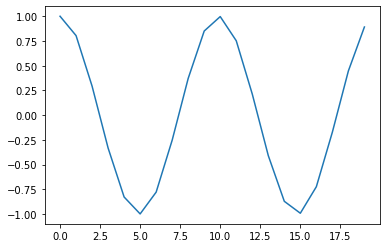

In [24]:
# It is easier with numpy, array library
import numpy as np
X = np.arange(20)
Y = np.cos(X/ math.pi * 2)
plt.plot(X, Y)

# How did the meetup fill up?

In [25]:
attendees_df['time_to_event'] = (attendees_df.updated_date - datetime.now()).dt.days
attendees_df.time_to_event.describe()

count    50.000000
mean     -6.840000
std       4.510125
min     -14.000000
25%     -11.000000
50%      -5.500000
75%      -3.000000
max      -1.000000
Name: time_to_event, dtype: float64

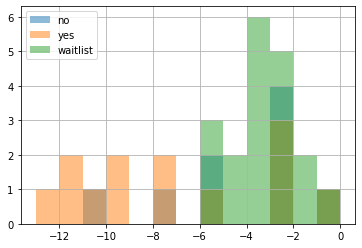

In [26]:
for response_type in attendees_df.response.unique():
    attendees_df[attendees_df.response == response_type].time_to_event.hist(alpha=0.5,label=response_type, bins=np.arange(-13, 1))
plt.legend();

In [27]:
total = attendees_df[attendees_df.response=='yes'].groupby('time_to_event').response.count().reindex(np.arange(-15, 0)).fillna(0).sort_index().cumsum()#.plot(label='attendance')

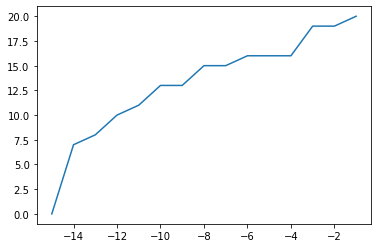

In [28]:
plt.plot(total.index.values, total.values)

Did the organiser change the event size in the last week? or is something misleading in the data we have?

# The importance of visualization

* Visualizing data is important to understand the data
* Generally, if the classification or predictions in your brain are not working, don't expect too much from machine learning
* if you have a machine learning model in production, you will want to track its performance over time, visualization will help
* Sometime, you want to accompany machine decisions by justifications
* You need to communicate results within the organization, visual communication is extremely useful

But don't fool yourself:

* Some patterns are irrelevant to your problem and only caused by the measurement mechanism (sampling, resolution...)
* Human are good to find patterns

And fon't fool others:
* be honest when representation data

# References:

* http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram
* [I dont' like notebooks](https://docs.google.com/presentation/d/1n2RlMdmv1p25Xy5thJUhkKGvjtV-dkAIsUXP-AL4ffI/edit?usp=sharing)